In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
completat422 = pd.read_csv('completat422.csv')
completat422.head()

loc  mun   est  est.1  est.2  ageb  \
0  NaN  1.0  30.0    2.0    NaN   0.0   
1  NaN  1.0  30.0    2.0    NaN   0.0   
2  NaN  1.0  30.0    2.0    NaN   0.0   
3  NaN  1.0  30.0    2.0    NaN   0.0   
4  NaN  1.0  30.0    2.0    NaN   0.0   

                                          t  t.1            cd_a  \
0  Localidades mayores de 100000 habitantes  NaN  Aguascalientes   
1  Localidades mayores de 100000 habitantes  NaN  Aguascalientes   
2  Localidades mayores de 100000 habitantes  NaN  Aguascalientes   
3  Localidades mayores de 100000 habitantes  NaN  Aguascalientes   
4  Localidades mayores de 100000 habitantes  NaN  Aguascalientes   

              ent  ...  p9_m5  p9_6 p9_h6  p9_m6  \
0  Aguascalientes  ...    NaN   NaN   NaN    NaN   
1  Aguascalientes  ...    NaN   NaN   NaN    NaN   
2  Aguascalientes  ...    NaN   NaN   NaN    NaN   
3  Aguascalientes  ...    NaN   NaN   NaN    NaN   
4  Aguascalientes  ...    NaN   NaN   NaN    NaN   

                                                p9_7 p9_h7 p9_m7  p9_8 p9_h8  \
0  realizar los quehaceres de su hogar? (lavar, p...  28.0   0.0   NaN   NaN   
1  realizar los quehaceres de su hogar? (lavar, p...   3.0   0.0   NaN   NaN   
2  realizar los quehaceres de su hogar? (lavar, p...   3.0   0.0   NaN   NaN   
3  realizar los quehaceres de su hogar? (lavar, p...   2.0   0.0   NaN   NaN   
4  realizar los quehaceres de su hogar? (lavar, p...  35.0   0.0   NaN   NaN   

  p9_m8  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 350 columns]

In [3]:
base_descrip = completat422[['sex', 'eda', 'niv_ins', 't_loc_men',
                            'clase1', 'clase2', 'clase3',
                            'rama','c_ocu11c', 'ing7c', 'ingocup', 'ing_x_hrs',
                            'fac','est_d_men','upm']]

Text(0.5, 1.0, 'Conteo de encuestados por sexo')

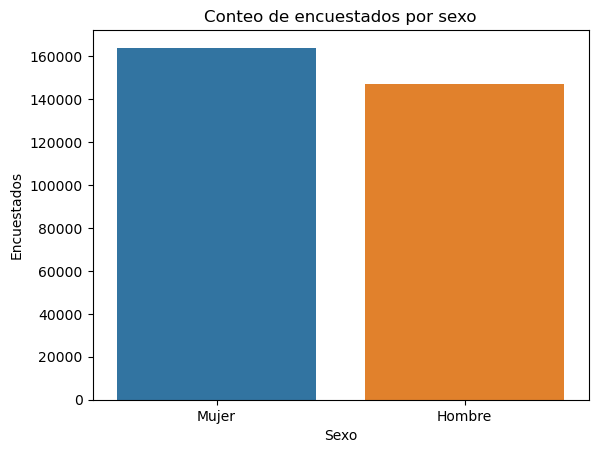

In [4]:
sns.countplot(x='sex', data=base_descrip)
plt.xlabel('Sexo')
plt.ylabel('Encuestados')
plt.title('Conteo de encuestados por sexo')

In [5]:
ins = base_descrip[base_descrip['niv_ins']!='No especificado']

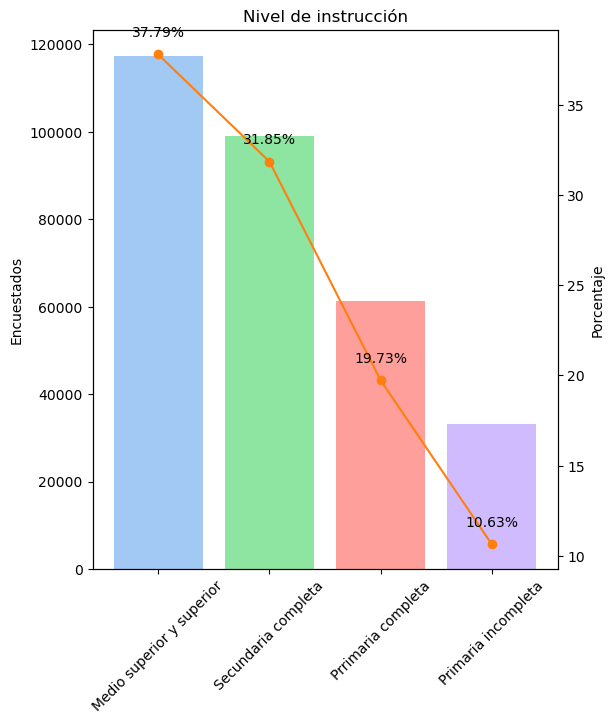

In [6]:
ins_table = ins['niv_ins'].value_counts().reset_index()
total = sum(ins_table['count'])
ins_table['porcentaje'] = (ins_table['count']/total*100)

#Gráfico
fig, ax1 = plt.subplots(figsize=(6, 7))
ax1.set_ylabel('Encuestados')
ax1.bar(ins_table['niv_ins'], ins_table['count'], color=['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff'], label='Encuestados')
ax1.tick_params(axis='x', rotation=45)

ax2= ax1.twinx()
ax2.set_ylabel('Porcentaje')
ax2.plot(ins_table['niv_ins'], ins_table['porcentaje'], color='tab:orange', marker='o', label='Porcentaje')
ax2.tick_params(axis='x', rotation=45)

for i, porcentaje in enumerate(ins_table['porcentaje']):
    ax2.text(i, porcentaje + 1, f'{round(porcentaje,2)}%', ha='center')

plt.title('Nivel de instrucción')
plt.show()

In [7]:
# Comparar nivel de escolaridad por sexos
sex_compare = base_descrip[['sex', 'niv_ins']]

In [8]:
sex_educ = sex_compare[['sex', 'niv_ins']].value_counts().reset_index()
sex_educ['porcentaje'] = (sex_educ['count']/total*100)
sex_educ

sex                    niv_ins  count  porcentaje
0   Mujer  Medio superior y superior  59824   19.251426
1  Hombre  Medio superior y superior  57599   18.535419
2   Mujer        Secundaria completa  53600   17.248537
3  Hombre        Secundaria completa  45380   14.603332
4   Mujer         Prrimaria completa  32232   10.372292
5  Hombre         Prrimaria completa  29072    9.355400
6   Mujer        Primaria incompleta  18112    5.828461
7  Hombre        Primaria incompleta  14932    4.805133
8  Hombre            No especificado    167    0.053741
9   Mujer            No especificado    165    0.053097

In [9]:
import numpy as np


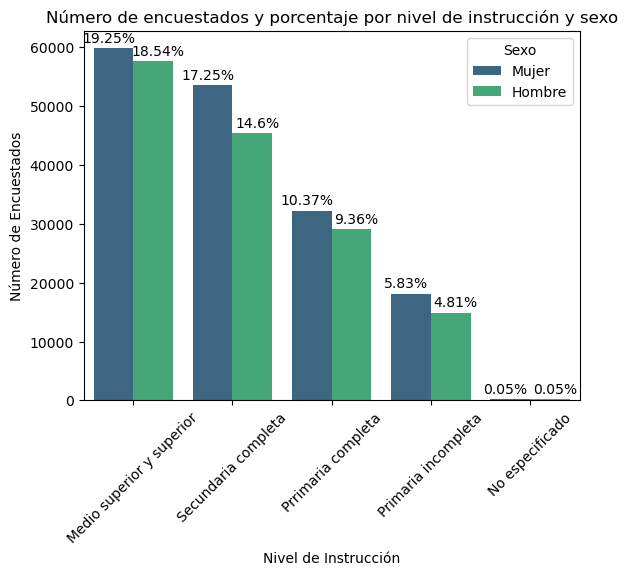

In [12]:
ax = sns.barplot(data=sex_educ, x='niv_ins', y='count', hue='sex', palette='viridis')

#Etiquetas de porcentaje
for index, row in sex_educ.iterrows():
    ax.text(index // 2 - 0.25 + (0.5 if row['sex'] == 'Hombre' else 0),
           row['count']+1000,
           f"{round(row['porcentaje'], 2)}%",
           color = 'black', ha='center', fontsize=10)
#Configuración del gráfico
plt.title('Número de encuestados y porcentaje por nivel de instrucción y sexo')
plt.xlabel('Nivel de Instrucción')
plt.ylabel('Número de Encuestados')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

In [14]:
base_descrip['clase2'].value_counts()

clase2
Población ocupada       174135
No disponibles          115583
Disponibles              16263
Población desocupada      5102
Name: count, dtype: int64

In [15]:
# Filtrar los datos de población ocupada con edad mayor a 14 años
pob_ocup = base_descrip.query("clase2=='Población ocupada' and eda > 14")
# Agrupar por "rama" y "sex", luego contar y pivotar para obtener columnas separadas
sex_rama = (pob_ocup.groupby(['rama', 'sex']).size()
           .unstack(fill_value=0).rename_axis(columns=None))
sex_rama['total'] = sex_rama.sum(axis=1)
sex_rama.loc['total'] = sex_rama.sum()
#Convertir columnas en porcentajes
sex_rama = sex_rama.div(sex_rama.max())*100
sex_rama = sex_rama.reset_index()
sex_rama

rama      Hombre       Mujer       total
0             Agropecuario   11.895334    2.905437    8.167039
1                 Comercio   15.787707   24.667651   19.470402
2             Construcción   13.182918    0.873721    8.078041
3  Industria manufacturera   17.204641   15.987570   16.699897
4          No especificado    0.842261    0.537889    0.716032
5                    Otros    1.373488    0.380424    0.961644
6                Servicios   39.713651   54.647306   45.906945
7                    total  100.000000  100.000000  100.000000

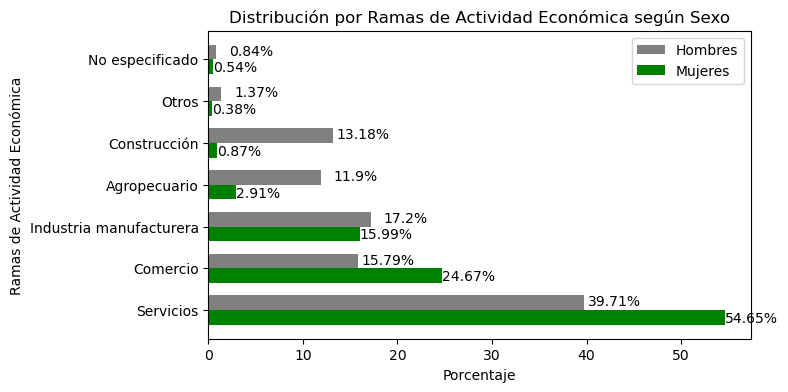

In [22]:
rama_grafica = sex_rama.sort_values('total')
fig, ax = plt.subplots(figsize=(7, 4))

# Tamaño de las barras
co = np.arange(len(rama_grafica['rama'][:-1]))
an = 0.35
#Parametrización de barras / co-an/2 = separación de columnas por categorías
ax.barh(co-an/2, rama_grafica["Hombre"][:-1], an, label='Hombres', color='grey')
ax.barh(co+an/2, rama_grafica["Mujer"][:-1], an, label='Mujeres', color='green')
# Porcentajes del grafico expersados en las barras
for i, j in zip(co, rama_grafica["Hombre"][:-1]):
    ax.annotate(f"{round(j, 2)}%", xy=(j+6, i-0.2), ha='right', va='center')
for i, j in zip(co, rama_grafica["Mujer"][:-1]):
    ax.annotate(f"{round(j, 2)}%", xy=(j, i + 0.2), ha='left', va='center')
# Títulos y Etiquetados
plt.xlabel('Porcentaje')
plt.ylabel('Ramas de Actividad Económica')
plt.title('Distribución por Ramas de Actividad Económica según Sexo')
plt.legend()
ax.set_yticks(co)
ax.set_yticklabels(rama_grafica['rama'][:-1])
ax.invert_yaxis()
plt.show()

In [24]:
pob_ocup_tasa=base_descrip.query("eda > 14  and eda < 85")

In [25]:
tabla_tasas = pob_ocup_tasa
tabla_tasas['eda5'] = pd.cut(tabla_tasas['eda'], bins=range(15,91,5), include_lowest=True, right=False)
tabla_pea = pd.crosstab(index=[tabla_tasas['eda5'], tabla_tasas['sex']], columns=tabla_tasas['clase1'], normalize='index')
tabla_pea = tabla_pea.unstack()
print(tabla_pea)

clase1   Población económicamente activa            \
sex                               Hombre     Mujer   
eda5                                                 
[15, 20)                        0.379491  0.206547   
[20, 25)                        0.735611  0.500190   
[25, 30)                        0.920410  0.628682   
[30, 35)                        0.950700  0.639801   
[35, 40)                        0.952757  0.652513   
[40, 45)                        0.952524  0.648884   
[45, 50)                        0.942882  0.626802   
[50, 55)                        0.913832  0.569751   
[55, 60)                        0.849627  0.478005   
[60, 65)                        0.660668  0.334233   
[65, 70)                        0.500244  0.221057   
[70, 75)                        0.371402  0.142115   
[75, 80)                        0.298124  0.095574   
[80, 85)                        0.187426  0.060423   

clase1   Población no económicamente activa            
sex                      

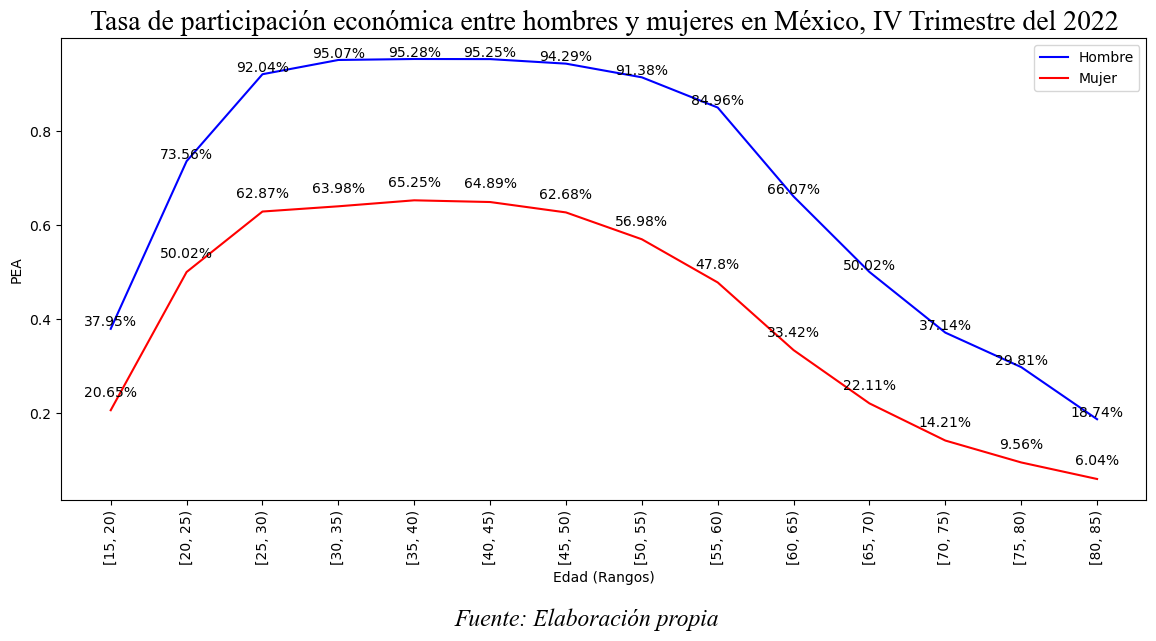

In [28]:
plt.figure(figsize=(14, 6))
tabla_pea.index = tabla_pea.index.astype(str)
plt.plot(tabla_pea.index, tabla_pea['Población económicamente activa', 'Hombre'], label='Hombre', color='blue')
plt.plot(tabla_pea.index, tabla_pea['Población económicamente activa', 'Mujer'], label='Mujer', color='red')

for i, value in enumerate(tabla_pea[('Población económicamente activa', 'Hombre')]):
    plt.annotate(f"{round(value*100, 2)}%", (tabla_pea.index[i], value), textcoords='offset points', xytext=(0,2), ha='center')
for i, value in enumerate(tabla_pea[('Población económicamente activa', 'Mujer')]):
    plt.annotate(f"{round(value*100, 2)}%", (tabla_pea.index[i], value), textcoords='offset points', xytext=(0,10), ha='center')

# Configuración del gráfico

font_t = {'family': 'Times New Roman', 'fontsize': 20}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 17}

plt.title('Tasa de participación económica entre hombres y mujeres en México, IV Trimestre del 2022', fontdict=font_t)
plt.figtext(0.5, -0.1, 'Fuente: Elaboración propia', ha='center', fontdict=font_p)
plt.xlabel('Edad (Rangos)')
plt.ylabel('PEA')
plt.legend()
plt.xticks(rotation=90)
plt.savefig('TPE_4t2022.png', bbox_inches='tight')
plt.show()